In [1]:
# sc.stop()

In [2]:
from Startup import *
print('df has %d rows, stations has %d rows'%(df.count(),stations.count()))

finished standard imports
dict_items([('spark.default.parallelism', '10'), ('spark.logConf', 'True'), ('spark.app.name', 'Weather_PCA'), ('spark.executor.memory', '3g'), ('spark.executor.cores', '1'), ('spark.cores.max', '4')])
started SparkContext and SQLContext in 13.27 seconds
loaded weather.parquet in 7.08 seconds
loaded stations.parquet in 0.19 seconds
registered dataframes as tables in 0.22 seconds
df has 9358394 rows, stations has 85284 rows


In [3]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'
"""
print(query)
CA_df=sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(CA_df,'CA_df')
CA_pdf=CA_df.toPandas()

query="""
SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='WA'
"""
print(query)
WA_df=sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(WA_df,'WA_df')
WA_pdf=WA_df.toPandas()


SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'


SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='WA'

CPU times: user 36 ms, sys: 4 ms, total: 40 ms
Wall time: 829 ms


In [4]:
%%time
query="""
SELECT year,COUNT(year) AS count
FROM weather  
GROUP BY year 
ORDER BY year
"""
print(query)
year_pdf=sqlContext.sql(query).toPandas()
year_pdf


SELECT year,COUNT(year) AS count
FROM weather  
GROUP BY year 
ORDER BY year

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 6.67 s


In [6]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'
"""

print(query)
CA_SNOW_df=sqlContext.sql(query)
CA_SNOW_pdf=CA_SNOW_df.toPandas()
sqlContext.registerDataFrameAsTable(CA_SNOW_df,'CA_SNOW_df')


SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'

CPU times: user 496 ms, sys: 44 ms, total: 540 ms
Wall time: 28.4 s


In [7]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='WA' AND weather.Measurement='SNOW'
"""

print(query)
WA_SNOW_df=sqlContext.sql(query)
WA_SNOW_pdf=WA_SNOW_df.toPandas()
sqlContext.registerDataFrameAsTable(WA_SNOW_df,'WA_SNOW_df')


SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='WA' AND weather.Measurement='SNOW'

CPU times: user 200 ms, sys: 12 ms, total: 212 ms
Wall time: 19.8 s


In [8]:
CA_SNOW_copy = CA_SNOW_pdf.copy()
WA_SNOW_copy = WA_SNOW_pdf.copy()

### Remove all zero rows

In [21]:
print(CA_SNOW_pdf.count())
CA_SNOW_pdf = CA_SNOW_pdf[CA_SNOW_pdf.apply(lambda x: any(x['Values']), axis=1)]
CA_SNOW_pdf = CA_SNOW_pdf[CA_SNOW_pdf.apply(lambda x: len(x['Values']) > 300, axis=1)]
print(CA_SNOW_pdf.count())

print(WA_SNOW_pdf.count())
WA_SNOW_pdf = WA_SNOW_pdf[WA_SNOW_pdf.apply(lambda x: any(x['Values']), axis=1)]
WA_SNOW_pdf = WA_SNOW_pdf[WA_SNOW_pdf.apply(lambda x: len(x['Values']) > 300, axis=1)]
print(WA_SNOW_pdf.count())

ID             28292
elevation      28292
state          28292
Station        28292
Measurement    28292
Year           28292
Values         28292
dtype: int64
ID             28292
elevation      28292
state          28292
Station        28292
Measurement    28292
Year           28292
Values         28292
dtype: int64
ID             20478
elevation      20478
state          20478
Station        20478
Measurement    20478
Year           20478
Values         20478
dtype: int64
ID             20478
elevation      20478
state          20478
Station        20478
Measurement    20478
Year           20478
Values         20478
dtype: int64


### Data v.s. Year distribution

[(1879, 1), (1889, 1), (1890, 1), (1891, 1), (1892, 2), (1893, 19), (1894, 22), (1895, 21), (1896, 34), (1897, 28), (1898, 33), (1899, 39), (1900, 29), (1901, 31), (1902, 36), (1903, 65), (1904, 39), (1905, 57), (1906, 76), (1907, 110), (1908, 83), (1909, 135), (1910, 172), (1911, 163), (1912, 159), (1913, 137), (1914, 98), (1915, 129), (1916, 182), (1917, 160), (1918, 166), (1919, 125), (1920, 84), (1921, 88), (1922, 141), (1923, 106), (1924, 167), (1925, 164), (1926, 157), (1927, 161), (1928, 167), (1929, 184), (1930, 197), (1931, 149), (1932, 216), (1933, 182), (1934, 117), (1935, 206), (1936, 223), (1937, 200), (1938, 219), (1939, 228), (1940, 219), (1941, 217), (1942, 262), (1943, 318), (1944, 305), (1945, 266), (1946, 229), (1947, 288), (1948, 623), (1949, 493), (1950, 375), (1951, 354), (1952, 356), (1953, 343), (1954, 315), (1955, 391), (1956, 362), (1957, 455), (1958, 320), (1959, 362), (1960, 366), (1961, 322), (1962, 463), (1963, 304), (1964, 352), (1965, 331), (1966, 273), 

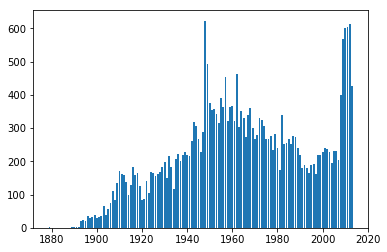

[(1890, 1), (1891, 4), (1892, 6), (1893, 27), (1894, 41), (1895, 42), (1896, 46), (1897, 46), (1898, 50), (1899, 64), (1900, 66), (1901, 67), (1902, 69), (1903, 71), (1904, 74), (1905, 82), (1906, 81), (1907, 87), (1908, 80), (1909, 105), (1910, 112), (1911, 115), (1912, 115), (1913, 121), (1914, 138), (1915, 147), (1916, 154), (1917, 155), (1918, 146), (1919, 144), (1920, 142), (1921, 135), (1922, 140), (1923, 136), (1924, 140), (1925, 138), (1926, 162), (1927, 166), (1928, 158), (1929, 172), (1930, 186), (1931, 174), (1932, 178), (1933, 189), (1934, 190), (1935, 193), (1936, 195), (1937, 199), (1938, 193), (1939, 196), (1940, 193), (1941, 163), (1942, 198), (1943, 200), (1944, 166), (1945, 186), (1946, 195), (1947, 192), (1948, 220), (1949, 230), (1950, 223), (1951, 227), (1952, 213), (1953, 173), (1954, 215), (1955, 216), (1956, 216), (1957, 217), (1958, 176), (1959, 213), (1960, 213), (1961, 203), (1962, 218), (1963, 198), (1964, 214), (1965, 204), (1966, 196), (1967, 183), (1968, 

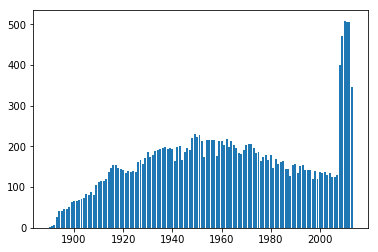

126 124
0 0


In [54]:
years = list(range(1763, 2014))
tca = CA_SNOW_pdf.loc[(CA_SNOW_pdf['Year'].isin(years))]
twa = WA_SNOW_pdf.loc[(WA_SNOW_pdf['Year'].isin(years))]

from collections import Counter
import matplotlib.pyplot as plt

c1 = sorted(Counter(tca['Year'].tolist()).items())
c2 = sorted(Counter(twa['Year'].tolist()).items())

print(c1)

plt.bar([c[0] for c in c1], [c[1] for c in c1])
plt.show()

print(c2)

plt.bar([c[0] for c in c2], [c[1] for c in c2])
plt.show()

print(len(c1), len(c2))
l1, l2 = [], []
for k in c1:
    if k[1] == 79:
        l1.append(k[0])
for k in c2:
    if k[1] == 79:
        l2.append(k)
print(len(l1), len(l2))

### Keep stations that has data across certain year range

In [55]:
years = list(range(1970, 2000))
tca = CA_SNOW_pdf.loc[(CA_SNOW_pdf['Year'].isin(years))]
twa = WA_SNOW_pdf.loc[(WA_SNOW_pdf['Year'].isin(years))]

c1 = Counter(tca['ID'].tolist())
c2 = Counter(twa['ID'].tolist())

print(len(c1), len(c2))
l1, l2 = [], []
for k in c1:
    if c1[k] == len(years):
        l1.append(k)
for k in c2:
    if c2[k] == len(years):
        l2.append(k)
print(len(l1), len(l2))

miniTca = tca.loc[(tca['ID'].isin(l1))]
miniTwa = twa.loc[(twa['ID'].isin(l2))]

736 245
51 67


In [57]:
import numpy
import pandas

def f1(row):
    return row['Values'][:181]

def f2(row):
    return row['Values'][181:]

def Jan2Jun(df):
    df_first = df.copy()
    df_first['V_first'] = df_first.apply(f1, axis=1)
    df_first['Year'] = df_first.apply(lambda x: x['Year']-1, axis=1)
    df_second = df.copy()
    df_second['V_second'] = df_second.apply(f2, axis=1)
    df_second = df_second.drop(['elevation', 'state', 'Station', 'Measurement', 'Values'], axis=1)
    result = pandas.merge(df_first, df_second, on=['ID', 'Year'], how='inner')
    result['Values'] = result.apply(lambda x: x['V_second'] + x['V_first'], axis=1)
    return result.drop(['V_second', 'V_first'], axis=1)
    

dca = Jan2Jun(miniTca)
dwa = Jan2Jun(miniTwa)
print(dca, dwa)

               ID  elevation state      Station Measurement  Year  \
0     USC00042239     1414.3    CA  USC00042239        SNOW  1970   
1     USC00042239     1414.3    CA  USC00042239        SNOW  1971   
2     USC00042239     1414.3    CA  USC00042239        SNOW  1972   
3     USC00042239     1414.3    CA  USC00042239        SNOW  1973   
4     USC00042239     1414.3    CA  USC00042239        SNOW  1974   
5     USC00042239     1414.3    CA  USC00042239        SNOW  1975   
6     USC00042239     1414.3    CA  USC00042239        SNOW  1976   
7     USC00042239     1414.3    CA  USC00042239        SNOW  1977   
8     USC00042239     1414.3    CA  USC00042239        SNOW  1978   
9     USC00042239     1414.3    CA  USC00042239        SNOW  1979   
10    USC00042239     1414.3    CA  USC00042239        SNOW  1980   
11    USC00042239     1414.3    CA  USC00042239        SNOW  1981   
12    USC00042239     1414.3    CA  USC00042239        SNOW  1982   
13    USC00042239     1414.3    CA

## Now start with dca and dwa as CA and WA data respectively